<a target="_blank" href="https://colab.research.google.com/github/IngCarlaPezzone/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_1_improving_accuracy_using_convolutions_traduccion.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Laboratorio no calificado: Mejora de la precisión de la visión por ordenador mediante convoluciones

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

# Ungraded Lab: Improving Computer Vision Accuracy using Convolutions


# Red neuronal superficial

En las lecciones anteriores has visto cómo hacer un reconocimiento de moda utilizando una red neuronal que contiene tres capas: la capa de entrada (con la forma de los datos), la capa de salida (con la forma de la salida deseada) y sólo una capa oculta. Experimentó con el impacto de diferentes tamaños de capa oculta, número de épocas de entrenamiento, etc. en la precisión final. Por comodidad, aquí tienes de nuevo el código completo. Ejecútalo y toma nota de la precisión de la prueba que se imprime al final. 

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

# Shallow Neural Network

In the previous lessons, you saw how to do fashion recognition using a neural network containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and only one hidden layer. You experimented with the impact of different sizes of hidden layer, number of training epochs etc on the final accuracy. For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end. 

In [1]:
import tensorflow as tf

# Cargar el conjunto de datos Fashion MNIST
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalizar los valores de los píxeles
training_images = training_images / 255.0
test_images = test_images / 255.0

In [2]:


# Definir el modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Configurar los parámetros de entrenamiento
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluar en el conjunto de pruebas
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4987 - accuracy: 0.8230
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3721 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3348 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2943 - accuracy: 0.8909

MODEL EVALUATION:
313/313 [==============================] - 1s 1ms/step - loss: 0.3528 - accuracy: 0.8773


## Red Neural Convolucional

En el modelo anterior, su precisión será probablemente de un 89% en el entrenamiento y un 87% en la validación. No está mal. Pero, ¿cómo hacer que sea aún mejor? Una forma es usar algo llamado _convoluciones_. No vamos a entrar en los detalles de las convoluciones en este cuaderno (por favor, vea los recursos en el aula), pero el concepto final es que reducen el contenido de la imagen para centrarse en partes específicas y esto probablemente mejorará la precisión del modelo. 

Si alguna vez has hecho el procesamiento de imágenes utilizando un filtro (como [esto](https://en.wikipedia.org/wiki/Kernel_(image_processing)), entonces las convoluciones te resultarán muy familiares. En resumen, se toma una matriz (normalmente de 3x3 o 5x5) y se recorre toda la imagen. Al cambiar los píxeles subyacentes basados en la fórmula dentro de esa matriz, puedes hacer cosas como la detección de bordes. Así, por ejemplo, si miras el enlace anterior, verás una matriz de 3x3 definida para la detección de bordes en la que la celda del medio es 8, y todas sus vecinas son -1. En este caso, para cada píxel, multiplicarías su valor por 8, y luego restarías el valor de cada vecino. Haga esto para cada píxel, y terminará con una nueva imagen que tiene los bordes mejorados.

Esto es perfecto para la visión por ordenador, ya que suele resaltar las características que distinguen un elemento de otro. Además, la cantidad de información que se necesita es mucho menor porque sólo se entrena en las características resaltadas.

Ese es el concepto de las **Redes Neuronales Evolutivas**. Añade algunas capas para hacer la convolución antes de tener las capas densas, y entonces la información que va a las capas densas está más enfocada y posiblemente es más precisa.

Ejecute el código siguiente. Esta es la misma red neuronal que antes, pero esta vez con las capas [Convolution](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) y [MaxPooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) añadidas primero. Llevará más tiempo, pero mira el impacto en la precisión.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

## Convolutional Neural Network

In the model above, your accuracy will probably be about 89% on training and 87% on validation. Not bad. But how do you make that even better? One way is to use something called _convolutions_. We're not going into the details of convolutions in this notebook (please see resources in the classroom), but the ultimate concept is that they narrow down the content of the image to focus on specific parts and this will likely improve the model accuracy. 

If you've ever done image processing using a filter (like [this](https://en.wikipedia.org/wiki/Kernel_(image_processing))), then convolutions will look very familiar. In short, you take an array (usually 3x3 or 5x5) and scan it over the entire image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 matrix that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision because it often highlights features that distinguish one item from another. Moreover, the amount of information needed is then much less because you'll just train on the highlighted features.

That's the concept of **Convolutional Neural Networks**. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focused and possibly more accurate.

Run the code below. This is the same neural network as earlier, but this time with [Convolution](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers added first. It will take longer, but look at the impact on the accuracy.

In [3]:
# Definir el modelo
model = tf.keras.models.Sequential([
                                                         
  # Añadir convoluciones y max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Añade las mismas capas que antes
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Imprime el resumen del modelo
model.summary()

# Usar la misma configuración
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluar en el conjunto de pruebas
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Es probable que haya subido a un 92% en los datos de entrenamiento y a un 90% en los datos de validación. Eso es significativo, y un paso en la dirección correcta.

Mira el código de nuevo, y ve, paso a paso, cómo se construyeron las convoluciones. En lugar de la capa de entrada en la parte superior, has añadido una [capa Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D). Los parámetros son:

1. El número de convoluciones que quieres generar. El valor aquí es puramente arbitrario pero es bueno usar potencias de 2 empezando por 32.
2. El tamaño de la convolución. En este caso, una cuadrícula de 3x3.
3. La función de activación a utilizar. En este caso, se utilizó un ReLU, que usted puede recordar es el equivalente de devolver `x` cuando `x>0`, de lo contrario devolver `0`.
4. En la primera capa, la forma de los datos de entrada.

Seguirá la convolución con una capa [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) que está diseñada para comprimir la imagen, manteniendo el contenido de las características que fueron resaltadas por la convolución. Al especificar `(2,2)` para el MaxPooling, el efecto es el de reducir a la cuarta parte el tamaño de la imagen. Sin entrar en demasiados detalles, la idea es crear una matriz de píxeles de 2x2 y elegir el más grande. Por lo tanto, convierte 4 píxeles en 1. Repite esto a través de la imagen, y al hacerlo, reduce a la mitad el número de píxeles horizontales y verticales, reduciendo efectivamente la imagen al 25% de la imagen original.

Puede llamar a `model.summary()` para ver el tamaño y la forma de la red, y notará que después de cada capa de agrupación máxima, el tamaño de la imagen se reduce de esta manera. 


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

It's likely gone up to about 92% on the training data and 90% on the validation data. That's significant, and a step in the right direction!

Look at the code again, and see, step by step how the convolutions were built. Instead of the input layer at the top, you added a [Conv2D layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D). The parameters are:

1. The number of convolutions you want to generate. The value here is purely arbitrary but it's good to use powers of 2 starting from 32.
2. The size of the Convolution. In this case, a 3x3 grid.
3. The activation function to use. In this case, you used a ReLU, which you might recall is the equivalent of returning `x` when `x>0`, else return `0`.
4. In the first layer, the shape of the input data.

You'll follow the convolution with a [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer which is designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying `(2,2)` for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one. Thus, it turns 4 pixels into 1. It repeats this across the image, and in doing so, it halves both the number of horizontal and vertical pixels, effectively reducing the image to 25% of the original image.

You can call `model.summary()` to see the size and shape of the network, and you'll notice that after every max pooling layer, the image size is reduced in this way. 


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


Luego agregaste otra convolución y aplanaste la salida.



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
  tf.keras.layers.Flatten(),
  
```

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

Then you added another convolution and flattened the output.



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
  tf.keras.layers.Flatten(),
  
```


Después de esto, sólo tendrás la misma estructura de DNN que la versión no convolucional. Las mismas 128 capas densas, y 10 capas de salida como en el ejemplo de preconvolución:



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activación='softmax')
])
```

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

After this, you'll just have the same DNN structure as the non convolutional version. The same 128 dense layers, and 10 output layers as in the pre-convolution example:



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


## Sobre el sobreajuste

Intente ejecutar el entrenamiento durante más épocas, digamos unas 20, y explore los resultados. Pero aunque los resultados parezcan muy buenos, los resultados de validación pueden bajar, debido a algo llamado _sobreajuste_. En pocas palabras, la sobreadaptación se produce cuando la red aprende muy bien los datos del conjunto de entrenamiento, pero está demasiado especializada sólo en esos datos, y como resultado es menos eficaz para interpretar otros datos no vistos. Por ejemplo, si toda tu vida sólo has visto zapatos rojos, cuando veas un zapato rojo serás muy bueno identificándolo. Pero los zapatos de gamuza azul podrían confundirte... y sabes que nunca debes meterte con mis zapatos de gamuza azul.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

## About overfitting

Try running the training for more epochs -- say about 20, and explore the results. But while the results might seem really good, the validation results may actually go down, due to something called _overfitting_. In a nutshell, overfitting occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at interpreting other unseen data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it. But blue suede shoes might confuse you... and you know you should never mess with my blue suede shoes.

# Visualización de las convoluciones y la agrupación

Vamos a explorar cómo mostrar las convoluciones gráficamente. La celda de abajo imprime las primeras 100 etiquetas del conjunto de prueba, y puedes ver que las del índice `0`, índice `23` e índice `28` tienen todas el mismo valor (es decir, `9`). Todos son zapatos. Echemos un vistazo al resultado de ejecutar la convolución en cada uno de ellos, y empezarás a ver que surgen características comunes entre ellos. Ahora, cuando la capa densa está entrenando con esos datos, está trabajando con mucho menos, y tal vez está encontrando una característica común entre los zapatos sobre la base de esta combinación de convolución/agrupación.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

# Visualizing the Convolutions and Pooling

Let's explore how to show the convolutions graphically. The cell below prints the first 100 labels in the test set, and you can see that the ones at index `0`, index `23` and index `28` are all the same value (i.e. `9`). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the dense layer is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [4]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 17ms/step


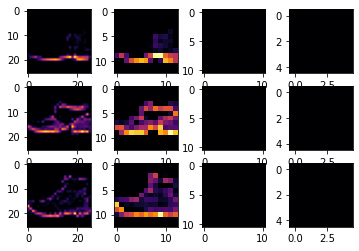

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)

    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)

    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

### EJERCICIOS

1. Intenta editar las convoluciones. Cambia los 32s por 16 o 64. ¿Qué impacto tendrá esto en la precisión y/o en el tiempo de entrenamiento?

2. Elimine la convolución final. ¿Qué impacto tendrá esto en la precisión o en el tiempo de entrenamiento?

3. ¿Qué tal si se añaden más Convoluciones? ¿Qué impacto crees que tendrá esto? Experimenta con ello.

4. Elimina todas las convoluciones menos la primera. ¿Qué impacto crees que tendrá esto? Experimente con ello. 

5. En la lección anterior implementaste una llamada de retorno para comprobar la función de pérdida y cancelar el entrenamiento una vez que alcanzara una determinada cantidad. Vea si puede implementar eso aquí.

<details><summary><font size="2" color="darkblue"><b> Texto Original </b></font></summary>

### EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here.